In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_center_square(image, crop_ratio=3.4):
    """Crop the center of the image into a square based on the given crop ratio."""
    height, width, _ = image.shape
    print(image.shape)
    if height > width:
        margin = int((height - width) * crop_ratio / 2)
        cropped = image[margin:height-margin, :, :]
    else:
        margin = int((width - height) * crop_ratio / 2)
        cropped = image[:, margin:width-margin, :]
    print(margin)

    # Determine the size of the square based on crop_ratio
    size = min(cropped.shape[0], cropped.shape[1])
    start_h = (cropped.shape[0] - size) // 2
    start_w = (cropped.shape[1] - size) // 2
    
    cropped_square = cropped[start_h:start_h + size, start_w:start_w + size]
    
    return cropped_square


# import matplotlib.pyplot as plt
# import scienceplots

# plt.style.use('science')



def plot_hsv_histogram(image):
    """Plot the HSV histogram of the image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    s_hist = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    v_hist = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].plot(h_hist, color='r')
    axs[0].set_title('Hue Histogram')
    axs[0].set_xlim([0, 180])
    
    axs[1].plot(s_hist, color='g')
    axs[1].set_title('Saturation Histogram')
    axs[1].set_xlim([0, 256])
    
    axs[2].plot(v_hist, color='b')
    axs[2].set_title('Value Histogram')
    axs[2].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

def plot_aggregated_hsv_histograms(title, images):
    """Plot aggregated HSV histograms of multiple images."""
    h_hist_agg = np.zeros((256, 1))  # Aggregate histogram for Hue channel
    l_hist_agg = np.zeros((256, 1))  # Aggregate histogram for Lightness channel
    s_hist_agg = np.zeros((256, 1))  # Aggregate histogram for Saturation channel
    
    for image_path in images:
        image = cv2.imread(image_path)
        hls_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS_FULL)
        h_hist = cv2.calcHist([hls_image], [0], None, [256], [0, 256])
        l_hist = cv2.calcHist([hls_image], [1], None, [256], [0, 256])
        s_hist = cv2.calcHist([hls_image], [2], None, [256], [0, 256])
        # import pdb; pdb.set_trace()

        h_hist_agg += h_hist
        l_hist_agg += l_hist
        s_hist_agg += s_hist
    

    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(h_hist_agg, color='r', label='Hue', alpha=1)
    ax.plot(l_hist_agg, color='g', label='Lightness', alpha=1)
    ax.plot(s_hist_agg, color='b', label='Saturation', alpha=1)
    
    ax.set_title(title)
    ax.set_xlim([0, 256])
    ax.legend()
    
    plt.tight_layout()
    plt.show()


In [26]:
import pdb

in_folder_path = '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Raw_Images'
out_folder_path = '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images'

image_files = [f for f in os.listdir(in_folder_path) if os.path.isfile(os.path.join(in_folder_path, f))]

for file in image_files:
    image_path = os.path.join(in_folder_path, file)
    image = cv2.imread(image_path)
    
    if image is not None:
        cropped_image = crop_center_square(image)
        cropped_image_path = os.path.join(out_folder_path, f"cropped_{file}")
        cv2.imwrite(cropped_image_path, cropped_image)
        
        print(f"Processed and saved cropped image: {cropped_image_path}")


(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica1.JPG
(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre1.JPG
(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre3.JPG
(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica3.JPG
(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica2.JPG
(3456, 4608, 3)
1958
Processed and saved cropped image: /Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Och

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo3.JPG']


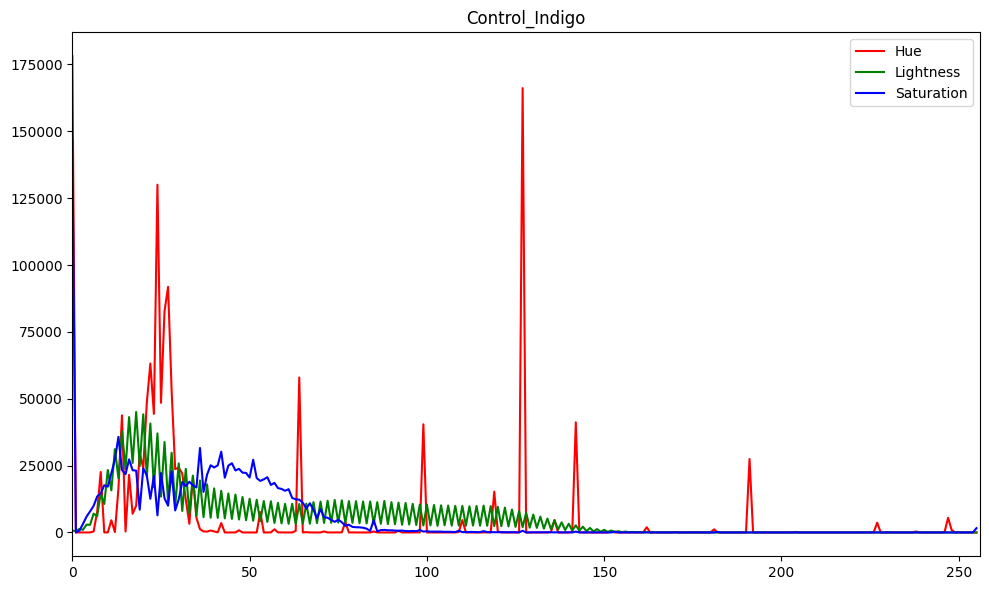

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica3.JPG']


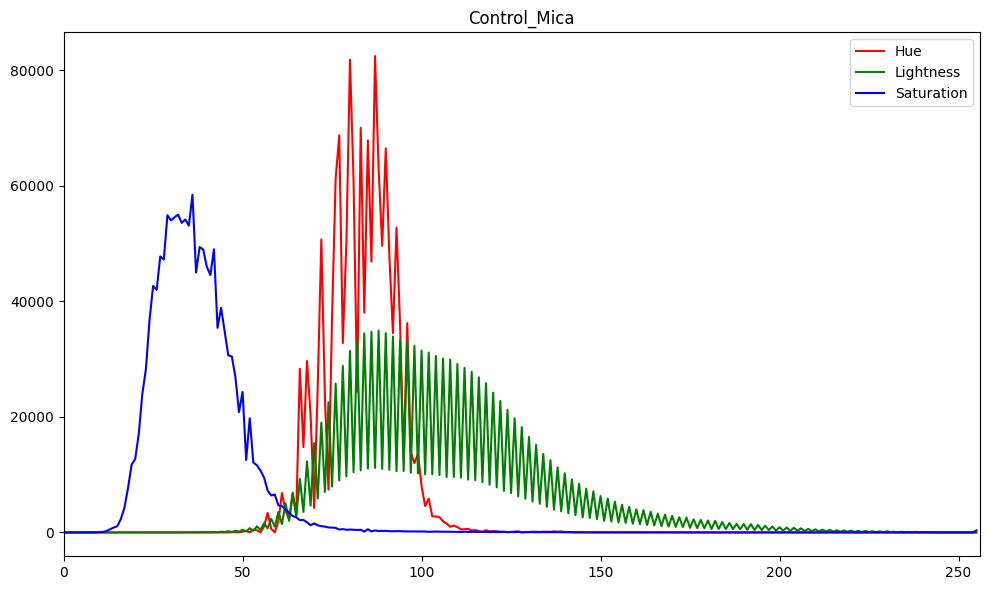

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre3.JPG']


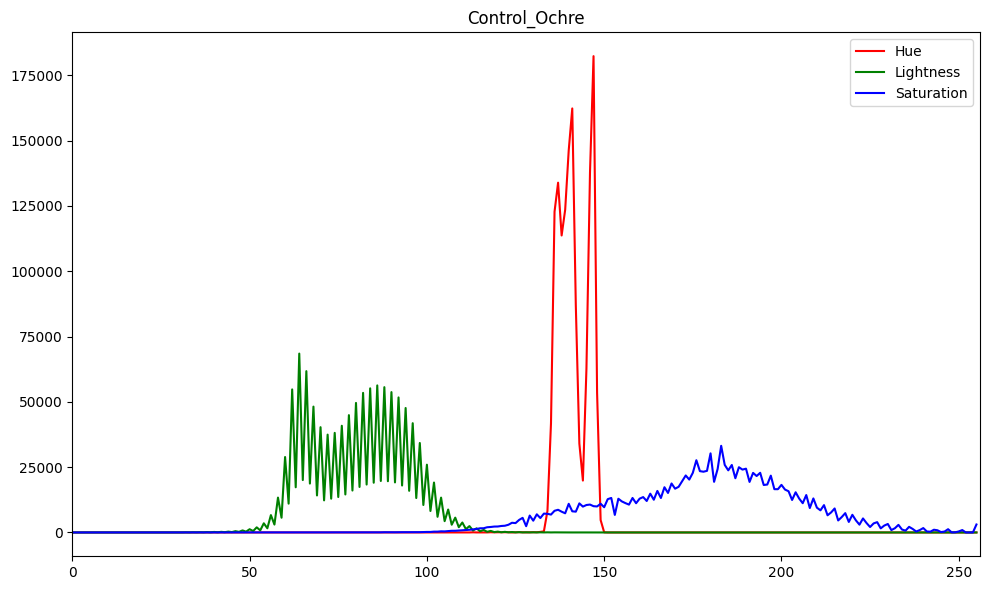

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo3.JPG']


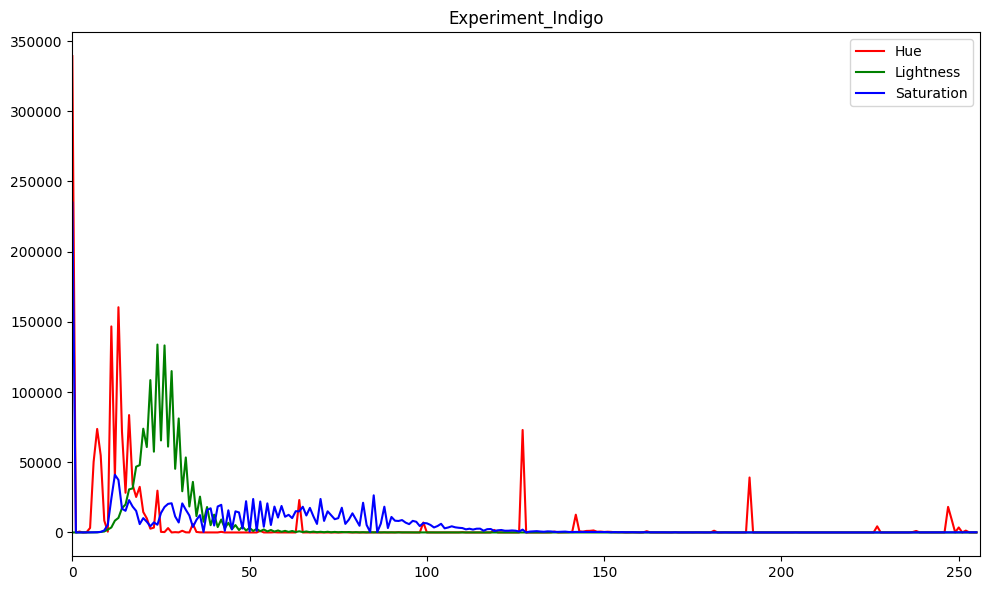

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica3.JPG']


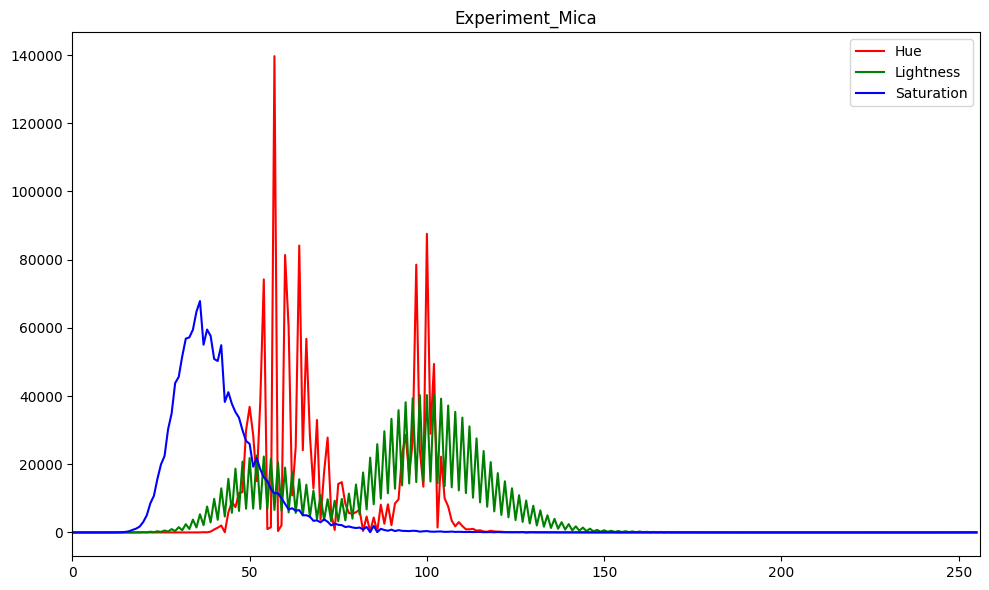

['/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre1.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre2.JPG', '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre3.JPG']


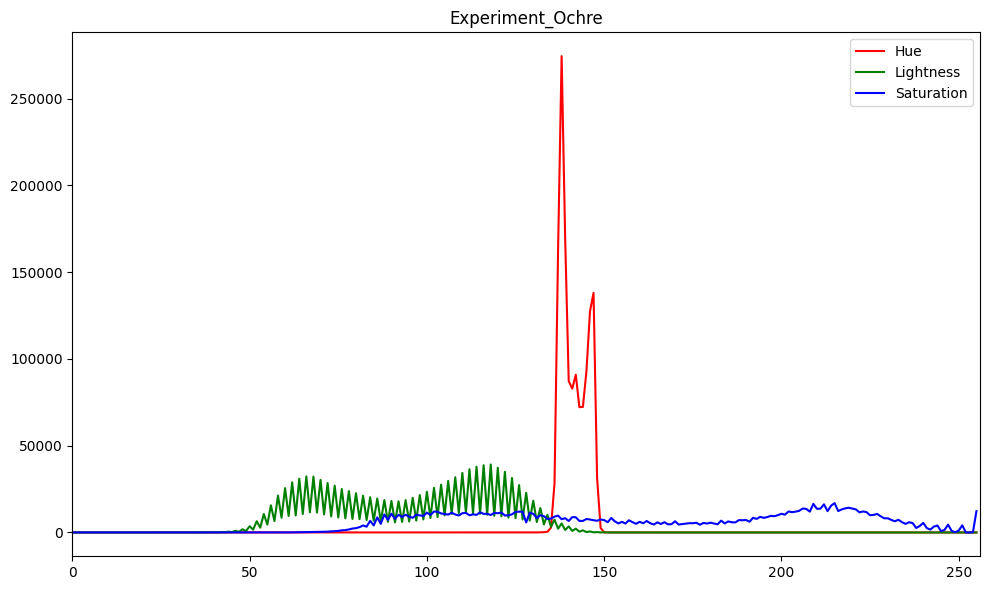

In [27]:

cropped_image_files = [f for f in os.listdir(out_folder_path) if os.path.isfile(os.path.join(out_folder_path, f))]
groups = [
    ('Control_Indigo',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Indigo3.JPG",
    ]),
    ('Control_Mica',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Mica3.JPG",
    ]),
    ('Control_Ochre',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Control_Ochre3.JPG",
    ]),
    ('Experiment_Indigo',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Indigo3.JPG",
    ]),
    ('Experiment_Mica',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Mica3.JPG",
    ]),
    ('Experiment_Ochre',[
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre1.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre2.JPG",
        "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/Lactose_Paints/Cropped_Images/cropped_Experiment_Ochre3.JPG",
    ]),

]
for title, files in groups:
    print(files)
    plot_aggregated_hsv_histograms(title, files)
